In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing the file with the customer, products and orders data

cust_prods = pd.read_pickle(r'C:\Users\casbacar\Documents\Study\Data Immersion\Achievement 4\03_2025_Instacart basked analysis\02 Data\Prepared data\Customers_prods_final.pkl')

In [14]:
cust_prods.head()

,user_id,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,...,days_since_prior_order,add_to_cart_order,reordered,_merge,Busiest days,Busiest hours,max_order,loyalty_flag,spending_flag,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,0,both,Busiest days,Fewer orders,8,New customer,Low spender,Non-frequent customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,11.0,1,1,both,Regularly busy,Most orders,8,New customer,Low spender,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,10.0,2,1,both,Busiest days,Most orders,8,New customer,Low spender,Frequent customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,NaN,1,0,both,Regularly busy,Fewer orders,8,New customer,Low spender,19.0
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,30.0,2,1,both,Least busy days,Fewer orders,8,New customer,Low spender,Non-frequent customer


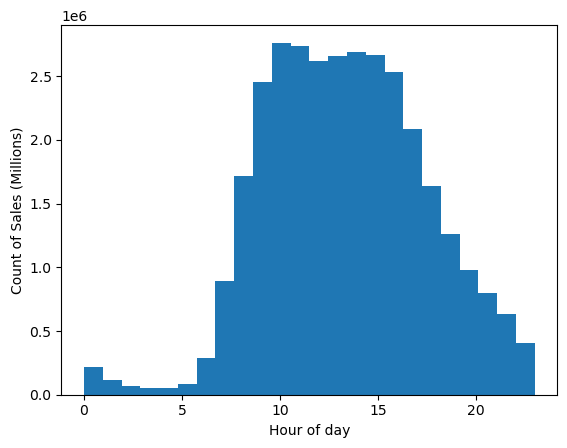

In [4]:
# Plotting a histogram for seeing the sales per hour of the day

hist = cust_prods['order_hour_of_day'].plot.hist(bins=24)
plt.xlabel('Hour of day') 
plt.ylabel('Count of Sales (Millions)')  
plt.show()

### Observation:
The histogram shows that most sales tend to happen between 10:00 and 15:00. The peak is 10:00. There don't seem to be any sales registered between 23:00 and 00:00.

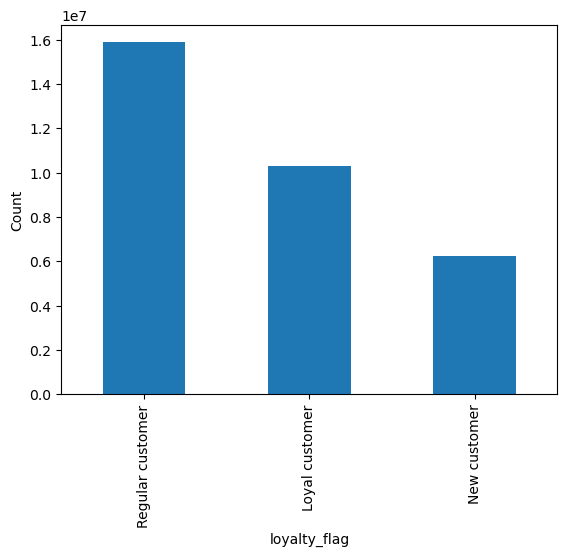

In [18]:
# Plot a bar chart that shows the orders distribution in terms of loyalty

bar_chart = cust_prods['loyalty_flag'].value_counts().plot.bar()

In [17]:
# For full context on the numbers show on the bar chart above

cust_prods['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

### Observation:
Regular customers order the most, followed by loyal customers and New customers.

In [4]:
# Create a line chart to see expenditure per hour of the day. First, we'll create a sample:

np.random.seed(4)
exp = np.random.rand(len(cust_prods)) <= 0.7

In [5]:
# 70% of the sample 

big_sample = cust_prods[exp]

In [36]:
# 30% of the sample

small_sample = cust_prods[~exp]

In [8]:
# Before plotting the line chart, we create a sample subset for the smaller sample
exp_hours_s = small_sample[['prices','order_hour_of_day']]

In [26]:
# WE do the same with the aample subset for the bigger sample

exp_hours_b = big_sample[['prices','order_hour_of_day']]

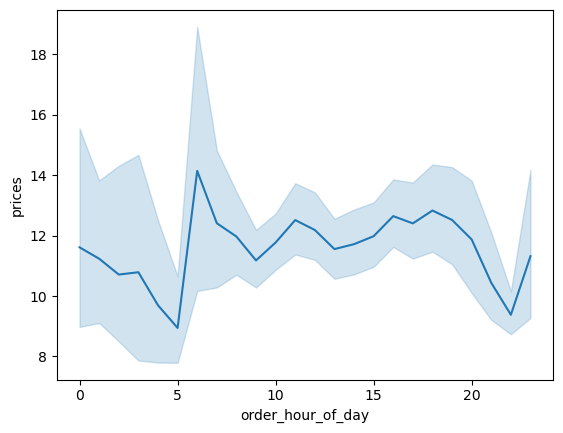

In [50]:
# We plot the line chart for the number for seeing the price of the order per hour of day

line_chart_s = sns.lineplot(data = exp_hours_s, x = 'order_hour_of_day',y = 'prices')

### Obsevations:

Although the number of orders at 6am is one of the lowest in the whole day, the expenditure amount is the highest at this time. The second highest seems to be on the late afternoon at around 18:00.

In [7]:
# Relationship between age and family situation (number of dependants). We first create a subset with Age and dependents columns

age_dep = small_sample[['Age','n_dependants']]

In [37]:
cust_prods.loc[cust_prods['Age'] <= 30, 'Age groups'] = '18-30'
cust_prods.loc[(cust_prods['Age'] > 30) & (cust_prods['Age'] <= 40), 'Age groups'] = '30-40'
cust_prods.loc[(cust_prods['Age'] > 40) & (cust_prods['Age'] <= 50), 'Age groups'] = '40-50'
cust_prods.loc[(cust_prods['Age'] > 50) & (cust_prods['Age'] <= 60), 'Age groups'] = '50-60'
cust_prods.loc[(cust_prods['Age'] > 60) & (cust_prods['Age'] <= 70), 'Age groups'] = '60-70'
cust_prods.loc[(cust_prods['Age'] > 70) & (cust_prods['Age'] <= 81), 'Age groups'] = '70-81'

In [39]:
small_sample_mean = small_sample.groupby('Age groups')[['income']].mean()

In [40]:
small_sample_mean.head(6)

,income
Age groups,
18-30,70436.583261
30-40,70585.015148
40-50,116397.940365
50-60,115039.715434
60-70,115727.128602
70-81,115688.562491


In [8]:
# Now we plot the line chart

plt.bar(age_dep['Age'], age_dep['n_dependants'])
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002ABA1C367A0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x000002ABE2AFB600> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

### Observations:

While the number of dependants is between 0 to 3, the y axis in the line chart only shows the values between 1.44 and 1.58. These values do not tell us the exact number of dependants per age group. As per the line itself, we see a few clear spikes for some age groups: 20, 60, ~65 and ~68. These age groups are more likely of having more dependants. For the age groups ~27, ~58, ~61 and 78 the opposite is true.

In [ ]:
small_sample.groupby('Age')['income']].mean()

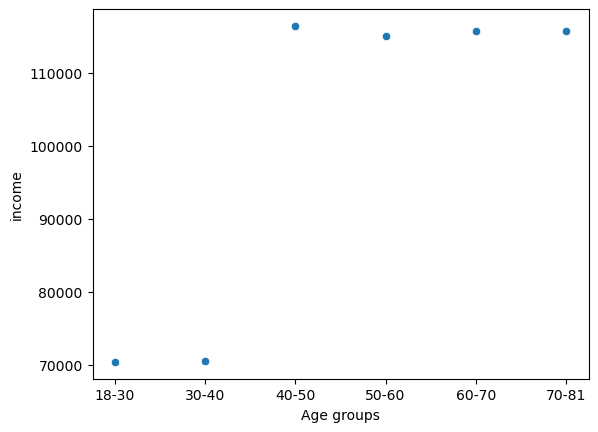

In [41]:
# Scatterplot for checking relationship between income and spending 

scatter_income_age = sns.scatterplot(x = 'Age groups', y = 'income',data = small_sample_mean)

### Observations:
We see that the age groups  between 40 and 80 years old have an income that comes close to 600K, while the income of the age groups of 20 and 30 does not surpass the 400K. Those over 40 

In [51]:
# Exporting all the data visualizations

hist.figure.savefig('C:/Users/casbacar/Documents/Study/Data Immersion/Achievement 4/03_2025_Instacart basked analysis/04 Analysis/Visualizations/histogram_4.9_order_hour.png')
bar_chart.figure.savefig('C:/Users/casbacar/Documents/Study/Data Immersion/Achievement 4/03_2025_Instacart basked analysis/04 Analysis/Visualizations/bar_chart_4.9_orders_customer.png')
line_chart_s.figure.savefig('C:/Users/casbacar/Documents/Study/Data Immersion/Achievement 4/03_2025_Instacart basked analysis/04 Analysis/Visualizations/bar_chart_4.9_price_order_perhour.png')
line_chart_age.figure.savefig('C:/Users/casbacar/Documents/Study/Data Immersion/Achievement 4/03_2025_Instacart basked analysis/04 Analysis/Visualizations/bar_chart_4.9_age_dependants.png')
scatter_income_age.figure.savefig('C:/Users/casbacar/Documents/Study/Data Immersion/Achievement 4/03_2025_Instacart basked analysis/04 Analysis/Visualizations/bar_chart_4.9_age_dependants.png')